# 01 - Data Exploration and EDA

## Overview
This notebook focuses on comprehensive exploratory data analysis of the ESG and Financial Performance dataset. We'll examine data quality, distributions, correlations, and patterns across industries and regions.

**Objectives:**
- Load and inspect the dataset
- Assess data quality and missing values
- Analyze distributions of key variables
- Explore correlations between ESG and financial metrics
- Investigate industry and regional patterns

**Outputs:**
- Clean dataset ready for preprocessing
- EDA insights and visualizations
- Data quality report

## 1. Library Imports and Setup

In [37]:
# Standard Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Statistical Analysis
import scipy.stats as stats

# Utilities
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print("EDA libraries imported successfully!")

EDA libraries imported successfully!


## 2. Data Loading and Initial Inspection

In [38]:
# Load the dataset
try:
    data = pd.read_csv('../Data/company_esg_financial_dataset.csv')
    print("Dataset loaded successfully from ../Data/")
except FileNotFoundError:
    print("Dataset not found. Please ensure the dataset is in the Data/ directory.")
    raise

print(f"Dataset shape: {data.shape}")
print(f"Memory usage: {data.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"\nColumns: {list(data.columns)}")

Dataset loaded successfully from ../Data/
Dataset shape: (11000, 16)
Memory usage: 3.19 MB

Columns: ['CompanyID', 'CompanyName', 'Industry', 'Region', 'Year', 'Revenue', 'ProfitMargin', 'MarketCap', 'GrowthRate', 'ESG_Overall', 'ESG_Environmental', 'ESG_Social', 'ESG_Governance', 'CarbonEmissions', 'WaterUsage', 'EnergyConsumption']


## 3. Dataset Overview and Basic Statistics

In [39]:
# Display first few rows
print("First 5 rows:")
display(data.head())

print("\nLast 5 rows:")
display(data.tail())

First 5 rows:


,CompanyID,CompanyName,Industry,Region,Year,Revenue,ProfitMargin,MarketCap,GrowthRate,ESG_Overall,ESG_Environmental,ESG_Social,ESG_Governance,CarbonEmissions,WaterUsage,EnergyConsumption
0,1,Company_1,Retail,Latin America,2015,459.2,6.0,337.5,NaN,57.0,60.7,33.5,76.8,35577.4,17788.7,71154.7
1,1,Company_1,Retail,Latin America,2016,473.8,4.6,366.6,3.2,56.7,58.9,32.8,78.5,37314.7,18657.4,74629.4
2,1,Company_1,Retail,Latin America,2017,564.9,5.2,313.4,19.2,56.5,57.6,34.0,77.8,45006.4,22503.2,90012.9
3,1,Company_1,Retail,Latin America,2018,558.4,4.3,283.0,-1.1,58.0,62.3,33.4,78.3,42650.1,21325.1,85300.2
4,1,Company_1,Retail,Latin America,2019,554.5,4.9,538.1,-0.7,56.6,63.7,30.0,76.1,41799.4,20899.7,83598.8



Last 5 rows:


,CompanyID,CompanyName,Industry,Region,Year,Revenue,ProfitMargin,MarketCap,GrowthRate,ESG_Overall,ESG_Environmental,ESG_Social,ESG_Governance,CarbonEmissions,WaterUsage,EnergyConsumption
10995,1000,Company_1000,Consumer Goods,Latin America,2021,3419.2,21.7,14416.7,0.4,52.2,67.2,46.3,43.1,498875.8,623594.7,2494378.8
10996,1000,Company_1000,Consumer Goods,Latin America,2022,3518.8,21.4,8078.9,2.9,51.9,68.7,44.7,42.3,506013.7,632517.1,2530068.4
10997,1000,Company_1000,Consumer Goods,Latin America,2023,3417.1,17.1,13263.4,-2.9,52.9,72.4,43.1,43.2,473561.5,591951.9,2367807.7
10998,1000,Company_1000,Consumer Goods,Latin America,2024,3183.2,15.7,6960.1,-6.8,52.0,72.4,40.5,42.9,441310.9,551638.6,2206554.3
10999,1000,Company_1000,Consumer Goods,Latin America,2025,3173.5,17.5,5666.1,-0.3,51.8,74.5,39.7,41.4,430741.6,538427.0,2153707.9


In [40]:
# Data types and info
print("Dataset Info:")
data.info()

print("\nData Types:")
print(data.dtypes)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CompanyID          11000 non-null  int64  
 1   CompanyName        11000 non-null  object 
 2   Industry           11000 non-null  object 
 3   Region             11000 non-null  object 
 4   Year               11000 non-null  int64  
 5   Revenue            11000 non-null  float64
 6   ProfitMargin       11000 non-null  float64
 7   MarketCap          11000 non-null  float64
 8   GrowthRate         10000 non-null  float64
 9   ESG_Overall        11000 non-null  float64
 10  ESG_Environmental  11000 non-null  float64
 11  ESG_Social         11000 non-null  float64
 12  ESG_Governance     11000 non-null  float64
 13  CarbonEmissions    11000 non-null  float64
 14  WaterUsage         11000 non-null  float64
 15  EnergyConsumption  11000 non-null  float64
dtypes: float

In [41]:
# Descriptive statistics
print("Descriptive Statistics - Numerical Variables:")
display(data.describe())

print("\nDescriptive Statistics - Categorical Variables:")
display(data.describe(include=['object']))

Descriptive Statistics - Numerical Variables:


,CompanyID,Year,Revenue,ProfitMargin,MarketCap,GrowthRate,ESG_Overall,ESG_Environmental,ESG_Social,ESG_Governance,CarbonEmissions,WaterUsage,EnergyConsumption
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,10000.000000,11000.000000,11000.000000,11000.000000,11000.000000,1.100000e+04,1.100000e+04,1.100000e+04
mean,500.500000,2020.000000,4670.850591,10.900455,13380.622236,4.830370,54.615273,56.416991,55.660582,51.767655,1.271462e+06,5.600442e+05,1.165839e+07
std,288.688113,3.162421,9969.954369,8.758711,39922.870373,9.424787,15.893937,26.767233,23.356152,25.323370,5.067760e+06,1.565686e+06,5.095836e+07
min,1.000000,2015.000000,35.900000,-20.000000,1.800000,-36.000000,6.300000,0.000000,0.000000,0.000000,2.042200e+03,1.021100e+03,5.105500e+03
25%,250.750000,2017.000000,938.775000,5.300000,1098.525000,-1.325000,44.100000,34.700000,37.600000,30.775000,1.228530e+05,6.488467e+04,3.069161e+05
50%,500.500000,2020.000000,1902.300000,10.500000,3096.450000,4.900000,54.600000,55.600000,55.150000,52.100000,2.920734e+05,2.038805e+05,1.221745e+06
75%,750.250000,2023.000000,4342.625000,16.300000,9995.500000,11.000000,65.600000,79.000000,73.800000,73.000000,7.407311e+05,5.251880e+05,5.616437e+06
max,1000.000000,2025.000000,180810.400000,50.000000,865271.700000,38.000000,98.800000,100.000000,100.000000,100.000000,1.741047e+08,5.223142e+07,1.741047e+09



Descriptive Statistics - Categorical Variables:


,CompanyName,Industry,Region
count,11000,11000,11000
unique,1000,9,7
top,Company_1,Healthcare,Asia
freq,11,1331,1672


## 4. Missing Values and Data Quality Assessment

In [42]:
# Missing values analysis
missing_values = data.isnull().sum()
missing_percent = (missing_values / len(data)) * 100

missing_df = pd.DataFrame({
    'Column': data.columns,
    'Missing_Count': missing_values.values,
    'Missing_Percentage': missing_percent.values
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)

print("Missing Values Summary:")
display(missing_df)

if len(missing_df) == 0:
    print("No missing values found in the dataset!")

Missing Values Summary:


,Column,Missing_Count,Missing_Percentage
8,GrowthRate,1000,9.090909


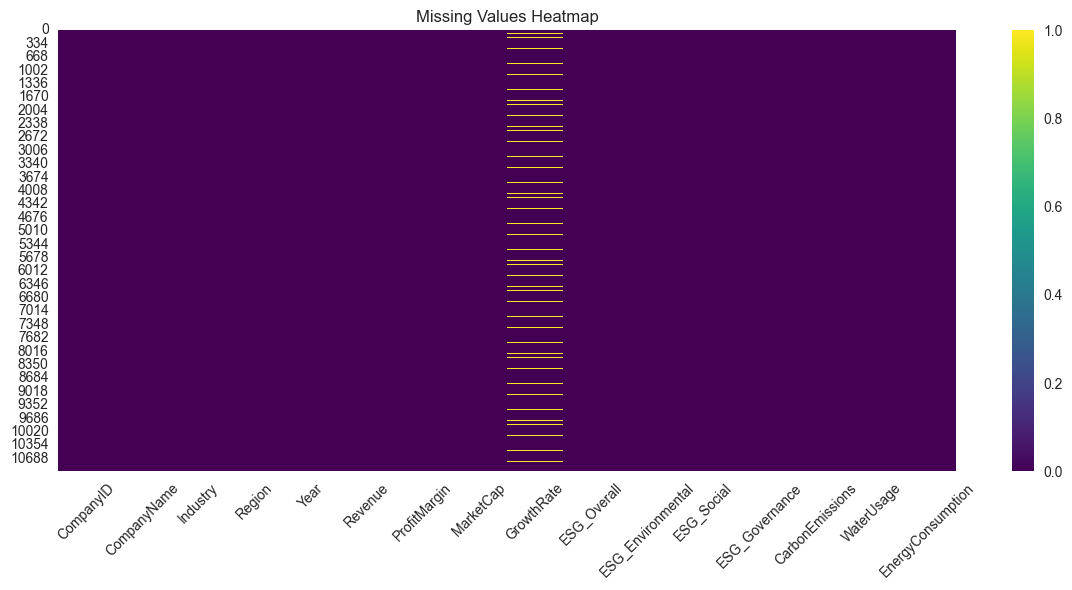

In [43]:
# Visualize missing values
if len(missing_df) > 0:
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.heatmap(data.isnull(), cbar=True, ax=ax, cmap='viridis')
    plt.title('Missing Values Heatmap')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No missing values to visualize.")

## 4. Distribution Analysis
Analyzing the distribution of key variables including financial metrics and ESG scores.

### 4.1 Define Feature Categories
Categorizing variables for focused analysis.

In [44]:
# Define feature categories for analysis
financial_features = ['Revenue', 'ProfitMargin', 'MarketCap', 'GrowthRate']
esg_features = ['ESG_Overall', 'ESG_Environmental', 'ESG_Social', 'ESG_Governance']
environmental_features = ['CarbonEmissions', 'WaterUsage', 'EnergyConsumption']
categorical_features = ['Industry', 'Region']
identifier_features = ['CompanyID', 'CompanyName', 'Year']

print("Feature Categories:")
print(f"Financial Features: {financial_features}")
print(f"ESG Features: {esg_features}")
print(f"Environmental Features: {environmental_features}")
print(f"Categorical Features: {categorical_features}")

# Combine all numerical features for distribution analysis
numerical_features = financial_features + esg_features + environmental_features
print(f"\nTotal numerical features for analysis: {len(numerical_features)}")
print(f"Numerical features: {numerical_features}")

Feature Categories:
Financial Features: ['Revenue', 'ProfitMargin', 'MarketCap', 'GrowthRate']
ESG Features: ['ESG_Overall', 'ESG_Environmental', 'ESG_Social', 'ESG_Governance']
Environmental Features: ['CarbonEmissions', 'WaterUsage', 'EnergyConsumption']
Categorical Features: ['Industry', 'Region']

Total numerical features for analysis: 11
Numerical features: ['Revenue', 'ProfitMargin', 'MarketCap', 'GrowthRate', 'ESG_Overall', 'ESG_Environmental', 'ESG_Social', 'ESG_Governance', 'CarbonEmissions', 'WaterUsage', 'EnergyConsumption']


### 4.2 Financial Metrics Distribution
Analyzing the distribution patterns of financial performance metrics.

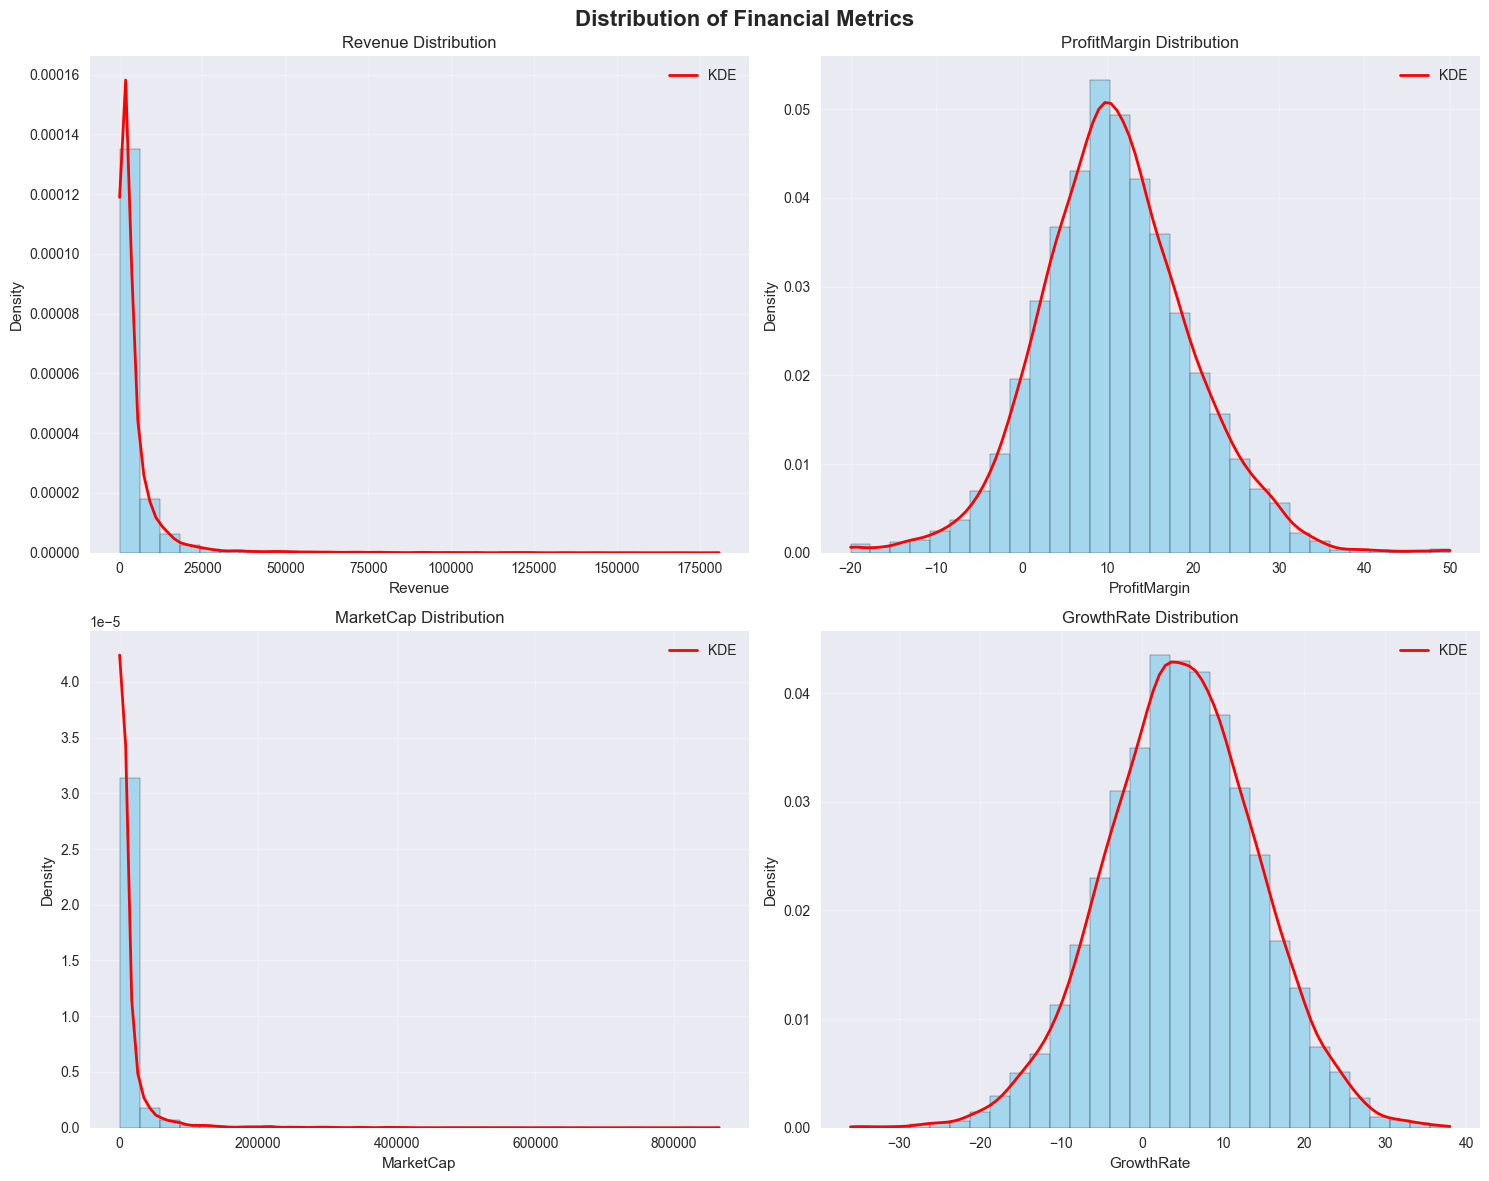

Financial Metrics - Statistical Summary:


,Revenue,ProfitMargin,MarketCap,GrowthRate
count,11000.000000,11000.000000,11000.000000,10000.000000
mean,4670.850591,10.900455,13380.622236,4.830370
std,9969.954369,8.758711,39922.870373,9.424787
min,35.900000,-20.000000,1.800000,-36.000000
25%,938.775000,5.300000,1098.525000,-1.325000
50%,1902.300000,10.500000,3096.450000,4.900000
75%,4342.625000,16.300000,9995.500000,11.000000
max,180810.400000,50.000000,865271.700000,38.000000


In [45]:
# Financial Metrics Distribution Analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Distribution of Financial Metrics', fontsize=16, fontweight='bold')

for i, feature in enumerate(financial_features):
    row = i // 2
    col = i % 2
    
    # Histogram with KDE
    axes[row, col].hist(data[feature].dropna(), bins=30, alpha=0.7, density=True, color='skyblue', edgecolor='black')
    
    # Add KDE curve
    if not data[feature].dropna().empty:
        from scipy.stats import gaussian_kde
        kde_data = data[feature].dropna()
        kde = gaussian_kde(kde_data)
        x_range = np.linspace(kde_data.min(), kde_data.max(), 100)
        axes[row, col].plot(x_range, kde(x_range), color='red', linewidth=2, label='KDE')
    
    axes[row, col].set_title(f'{feature} Distribution')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Density')
    axes[row, col].legend()
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistical summary for financial metrics
print("Financial Metrics - Statistical Summary:")
print("="*50)
financial_stats = data[financial_features].describe()
display(financial_stats)

### 4.3 ESG Scores Distribution
Examining the distribution patterns of ESG performance scores.

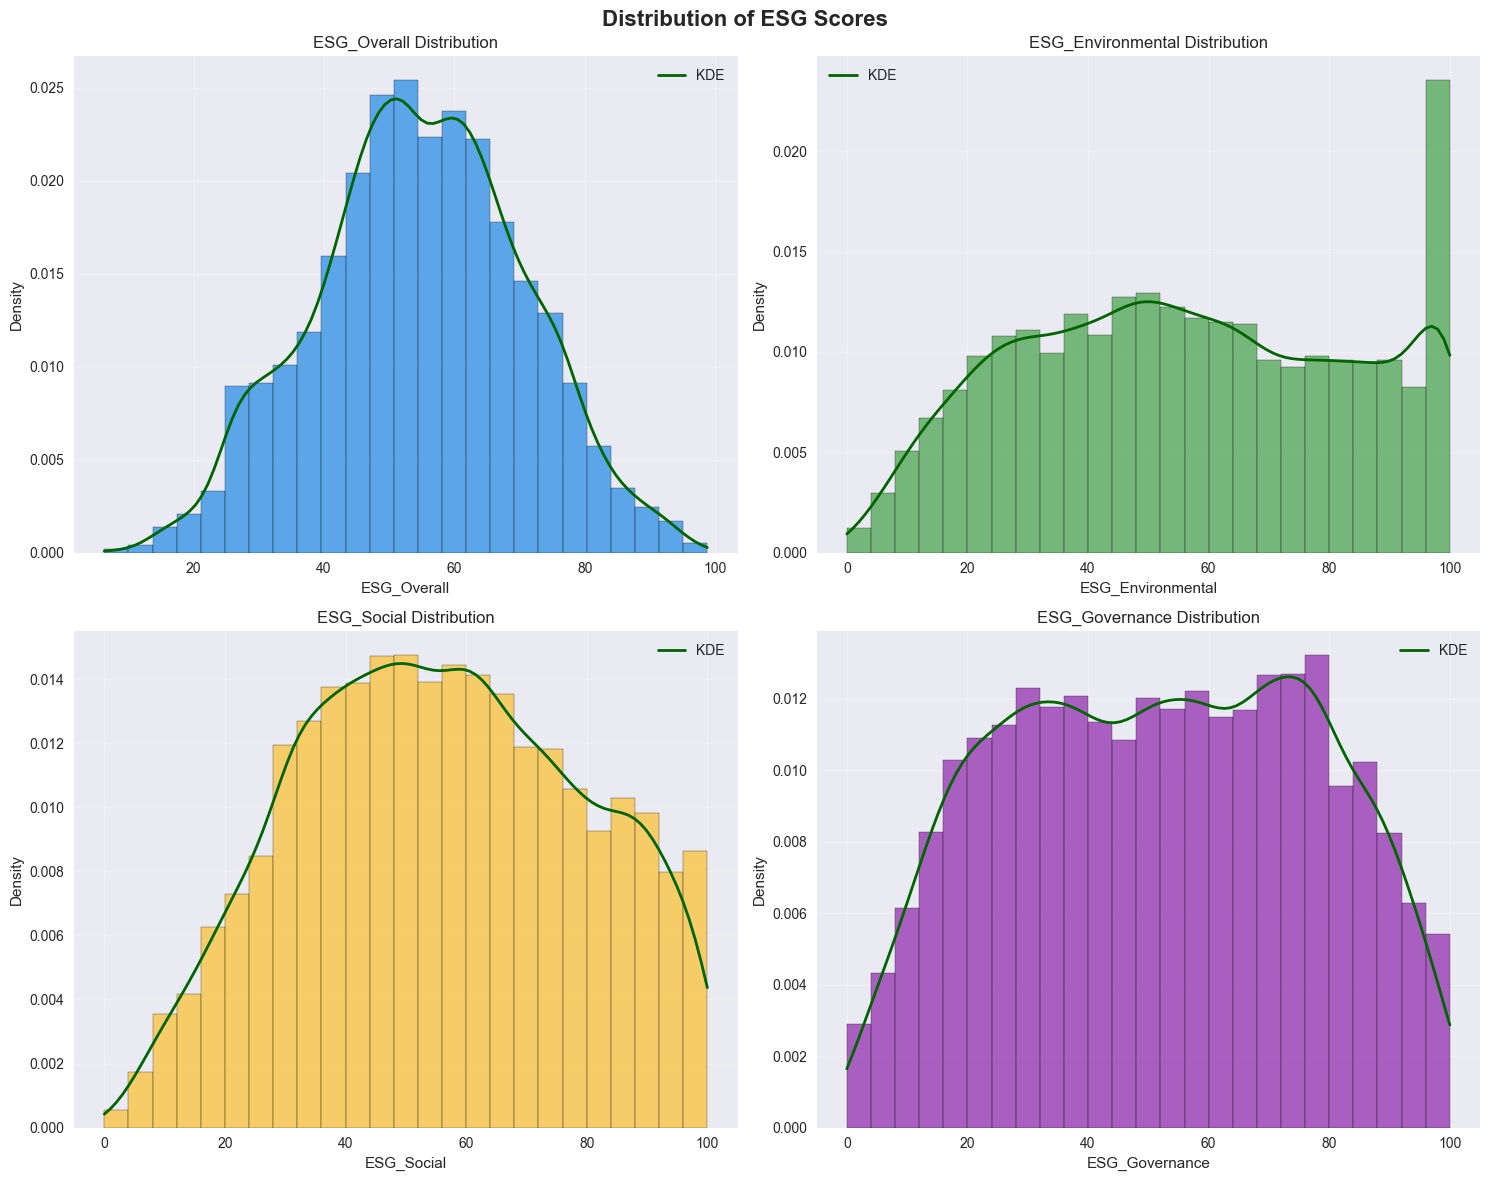

ESG Scores - Statistical Summary:


,ESG_Overall,ESG_Environmental,ESG_Social,ESG_Governance
count,11000.000000,11000.000000,11000.000000,11000.000000
mean,54.615273,56.416991,55.660582,51.767655
std,15.893937,26.767233,23.356152,25.323370
min,6.300000,0.000000,0.000000,0.000000
25%,44.100000,34.700000,37.600000,30.775000
50%,54.600000,55.600000,55.150000,52.100000
75%,65.600000,79.000000,73.800000,73.000000
max,98.800000,100.000000,100.000000,100.000000


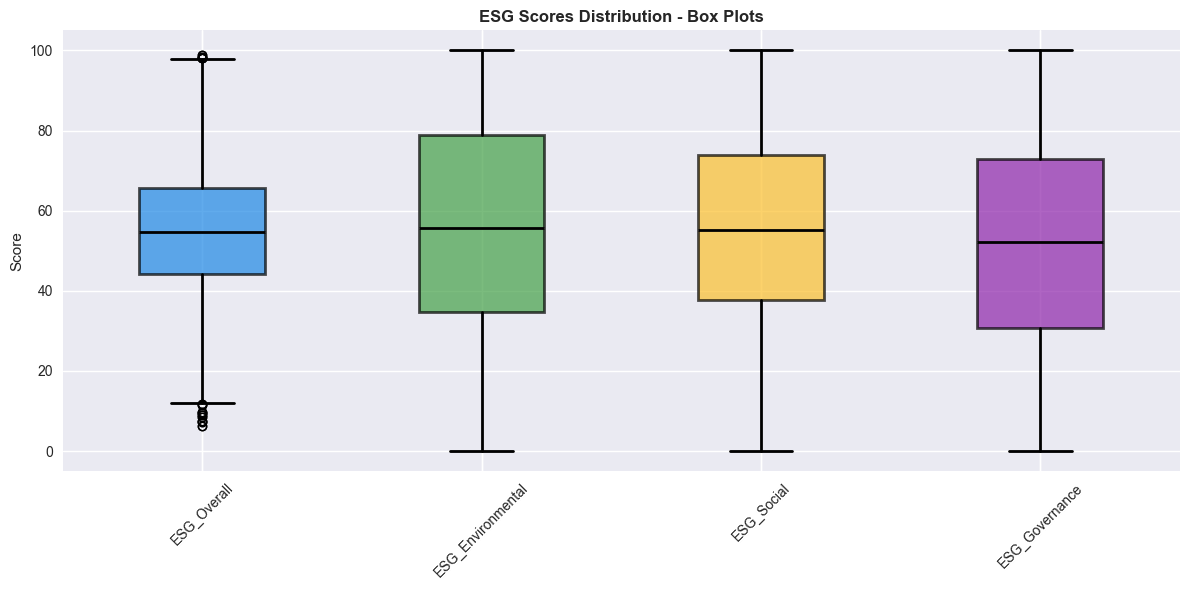

In [46]:
# ESG Scores Distribution Analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Distribution of ESG Scores', fontsize=16, fontweight='bold')

for i, feature in enumerate(esg_features):
    row = i // 2
    col = i % 2
    
    # Histogram with KDE
    # Use a different color for each ESG feature histogram
    # Change colors for ESG_Overall and ESG_Environmental
    if feature == 'ESG_Overall':
        hist_color = '#1e88e5'  # blue
    elif feature == 'ESG_Environmental':
        hist_color = '#43a047'  # green
    else:
        hist_color = box_colors_list[i]  # keep previous colors for others

    axes[row, col].hist(
        data[feature].dropna(),
        bins=25,
        alpha=0.7,
        density=True,
        color=hist_color,
        edgecolor='black'
    )
    
    # Add KDE curve
    if not data[feature].dropna().empty:
        from scipy.stats import gaussian_kde
        kde_data = data[feature].dropna()
        kde = gaussian_kde(kde_data)
        x_range = np.linspace(kde_data.min(), kde_data.max(), 100)
        axes[row, col].plot(x_range, kde(x_range), color='darkgreen', linewidth=2, label='KDE')
    
    axes[row, col].set_title(f'{feature} Distribution')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Density')
    axes[row, col].legend()
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistical summary for ESG metrics
print("ESG Scores - Statistical Summary:")
print("="*50)
esg_stats = data[esg_features].describe()
display(esg_stats)

# Box plots for ESG scores
fig, ax = plt.subplots(figsize=(12, 6))
data[esg_features].boxplot(ax=ax)
ax.set_title('ESG Scores Distribution - Box Plots')
# Use seaborn style for better visibility
sns.set_style("whitegrid")
# Use different colors for each ESG box and fill them for visibility
box_colors_list = [ '#1e88e5', '#43a047', '#fbc02d', '#8e24aa']  # blue, green, yellow, purple

# Draw the boxplot with patch_artist=True to allow box filling
bp = ax.boxplot([data[feature].dropna() for feature in esg_features],
                patch_artist=True, boxprops=dict(linewidth=2),
                whiskerprops=dict(linewidth=2),
                medianprops=dict(linewidth=2, color='black'),
                capprops=dict(linewidth=2),
                labels=esg_features)

# Fill each box with a different color
for patch, color in zip(bp['boxes'], box_colors_list):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

# Make the title bold
ax.set_title('ESG Scores Distribution - Box Plots', fontweight='bold')
ax.set_ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 4.4 Environmental Impact Distribution
Analyzing the distribution of environmental impact metrics.

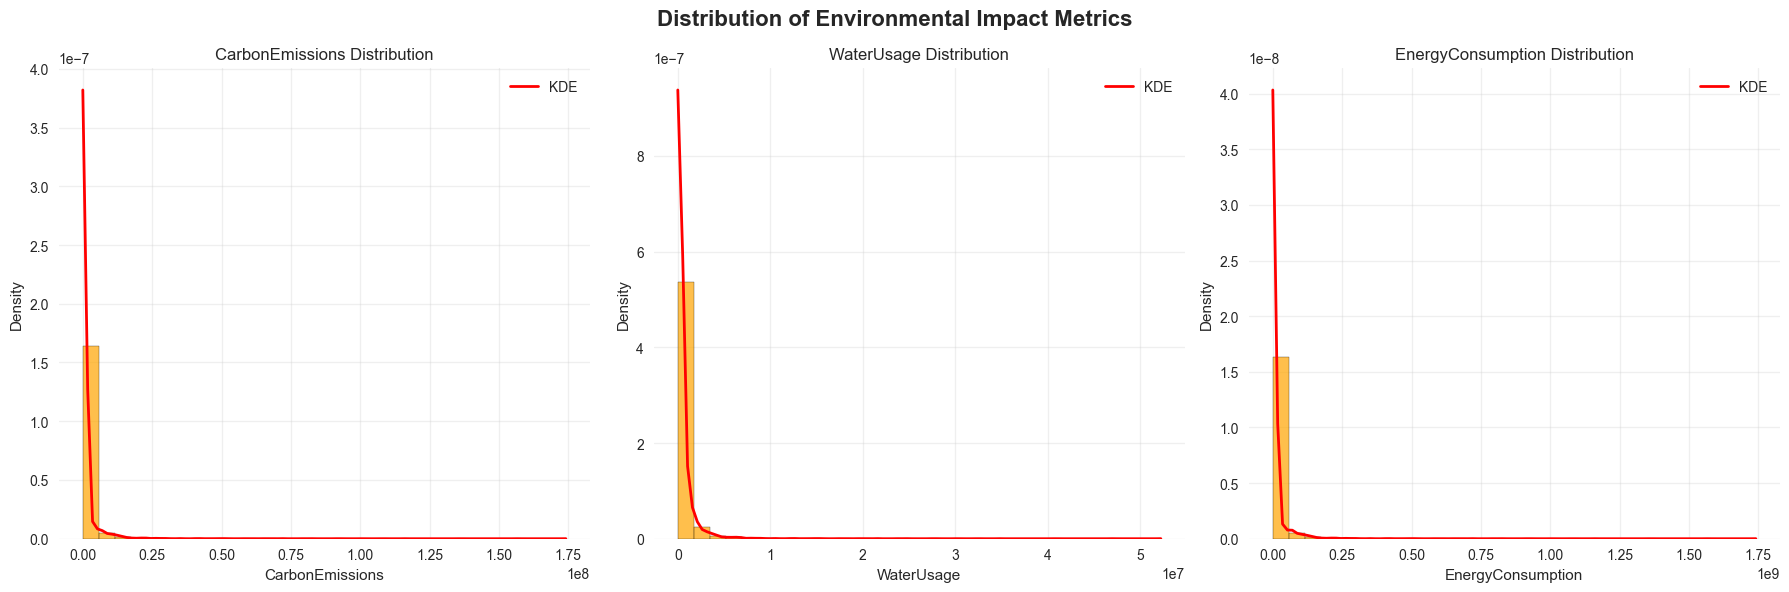

Environmental Impact Metrics - Statistical Summary:


,CarbonEmissions,WaterUsage,EnergyConsumption
count,1.100000e+04,1.100000e+04,1.100000e+04
mean,1.271462e+06,5.600442e+05,1.165839e+07
std,5.067760e+06,1.565686e+06,5.095836e+07
min,2.042200e+03,1.021100e+03,5.105500e+03
25%,1.228530e+05,6.488467e+04,3.069161e+05
50%,2.920734e+05,2.038805e+05,1.221745e+06
75%,7.407311e+05,5.251880e+05,5.616437e+06
max,1.741047e+08,5.223142e+07,1.741047e+09


In [47]:
# Environmental Impact Distribution Analysis
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Distribution of Environmental Impact Metrics', fontsize=16, fontweight='bold')

for i, feature in enumerate(environmental_features):
    # Histogram with KDE
    axes[i].hist(data[feature].dropna(), bins=30, alpha=0.7, density=True, color='orange', edgecolor='black')
    
    # Add KDE curve
    if not data[feature].dropna().empty:
        from scipy.stats import gaussian_kde
        kde_data = data[feature].dropna()
        kde = gaussian_kde(kde_data)
        x_range = np.linspace(kde_data.min(), kde_data.max(), 100)
        axes[i].plot(x_range, kde(x_range), color='red', linewidth=2, label='KDE')
    
    axes[i].set_title(f'{feature} Distribution')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Density')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistical summary for environmental metrics
print("Environmental Impact Metrics - Statistical Summary:")
print("="*50)
env_stats = data[environmental_features].describe()
display(env_stats)

### 4.5 Categorical Variables Distribution
Exploring the distribution of industry sectors and geographical regions.

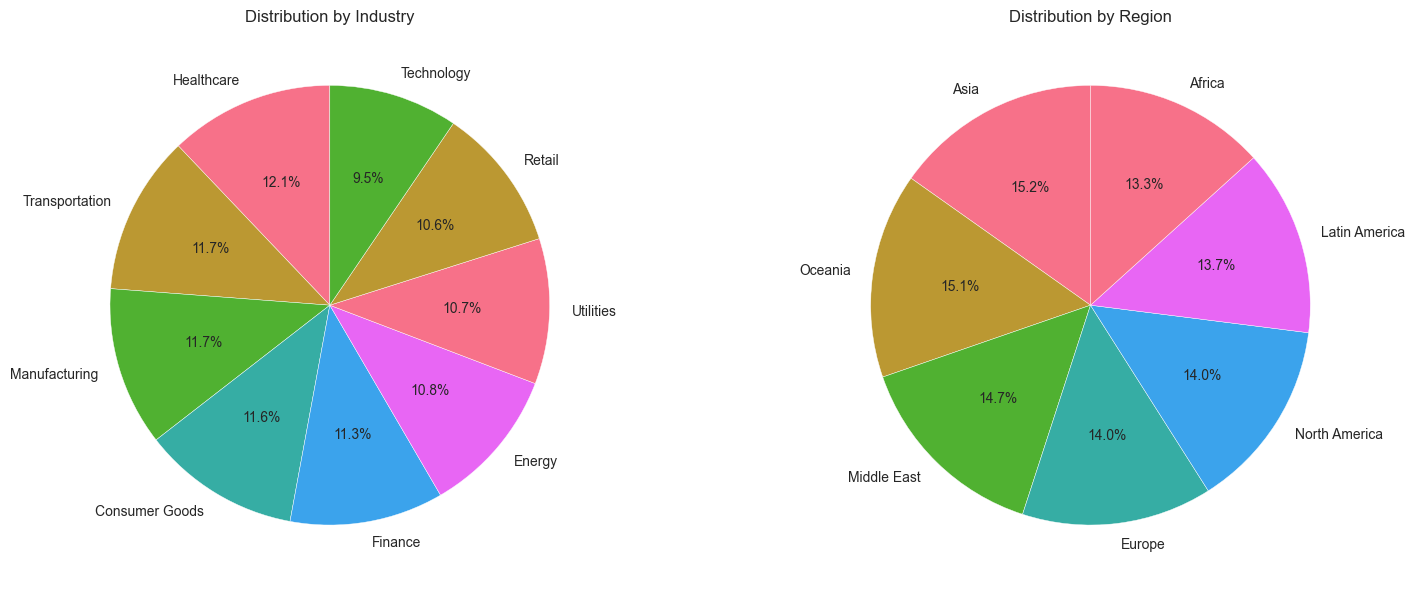

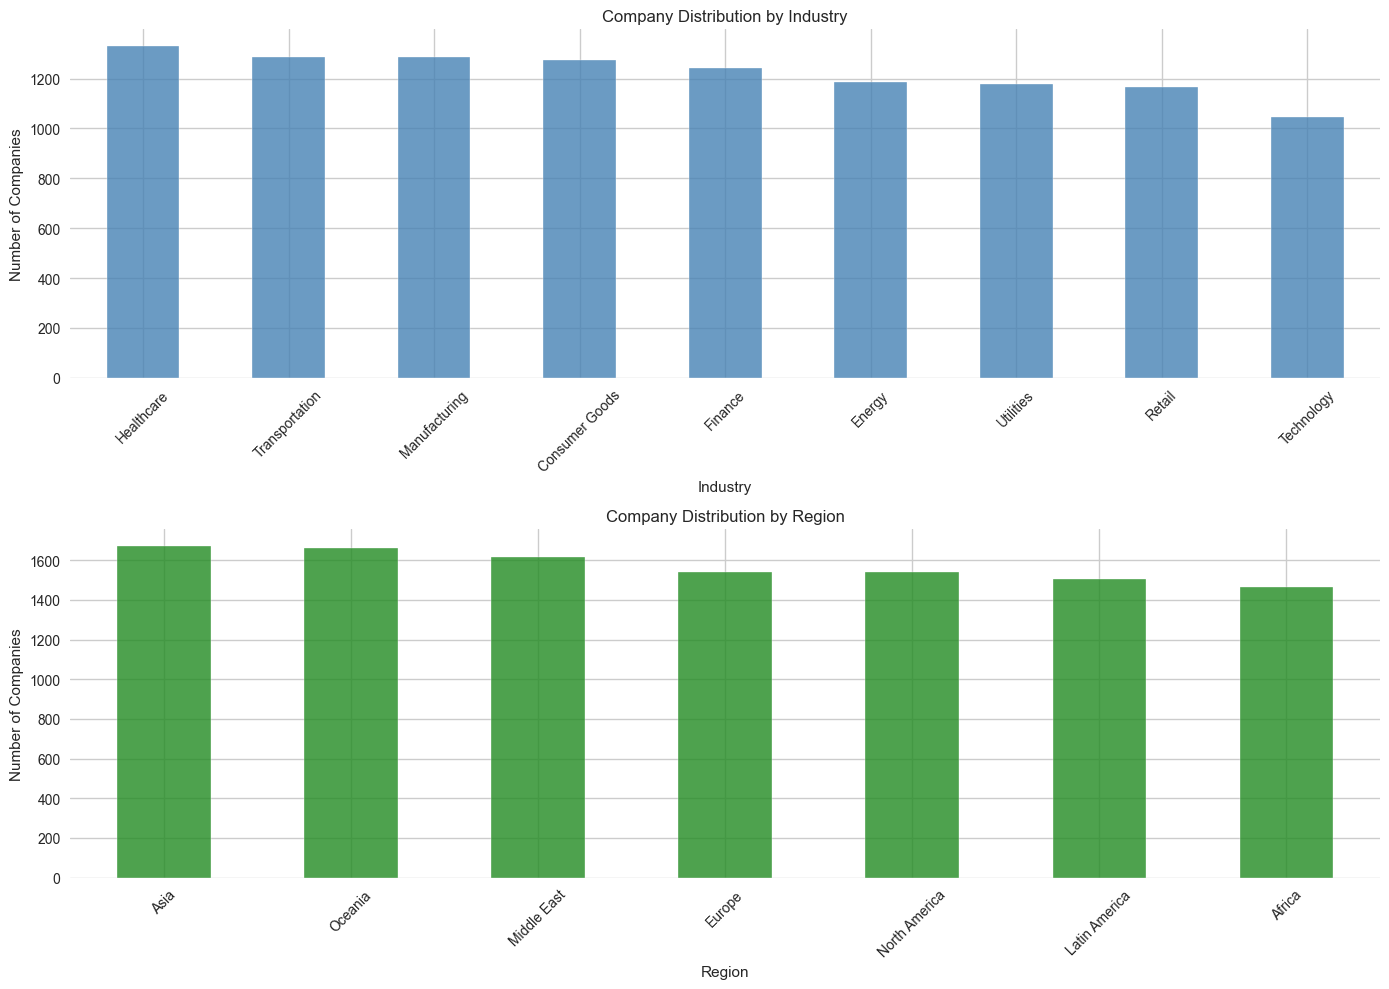

Categorical Variables Summary:
Number of unique industries: 9
Industries: ['Retail', 'Transportation', 'Technology', 'Finance', 'Healthcare', 'Energy', 'Consumer Goods', 'Utilities', 'Manufacturing']

Number of unique regions: 7
Regions: ['Latin America', 'Asia', 'Africa', 'Middle East', 'Oceania', 'Europe', 'North America']

Industry Distribution:
Industry
Healthcare        1331
Transportation    1287
Manufacturing     1287
Consumer Goods    1276
Finance           1243
Energy            1188
Utilities         1177
Retail            1166
Technology        1045
Name: count, dtype: int64

Region Distribution:
Region
Asia             1672
Oceania          1661
Middle East      1617
Europe           1540
North America    1540
Latin America    1507
Africa           1463
Name: count, dtype: int64


In [48]:
# Categorical Variables Distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Industry distribution
industry_counts = data['Industry'].value_counts()
axes[0].pie(industry_counts.values, labels=industry_counts.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Distribution by Industry')

# Region distribution
region_counts = data['Region'].value_counts()
axes[1].pie(region_counts.values, labels=region_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Distribution by Region')

plt.tight_layout()
plt.show()

# Bar charts for better readability
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Industry bar chart
industry_counts.plot(kind='bar', ax=axes[0], color='steelblue', alpha=0.8)
axes[0].set_title('Company Distribution by Industry')
axes[0].set_xlabel('Industry')
axes[0].set_ylabel('Number of Companies')
axes[0].tick_params(axis='x', rotation=45)

# Region bar chart
region_counts.plot(kind='bar', ax=axes[1], color='forestgreen', alpha=0.8)
axes[1].set_title('Company Distribution by Region')
axes[1].set_xlabel('Region')
axes[1].set_ylabel('Number of Companies')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print summary statistics
print("Categorical Variables Summary:")
print("="*50)
print(f"Number of unique industries: {data['Industry'].nunique()}")
print(f"Industries: {list(data['Industry'].unique())}")
print(f"\nNumber of unique regions: {data['Region'].nunique()}")
print(f"Regions: {list(data['Region'].unique())}")

print(f"\nIndustry Distribution:")
print(industry_counts)
print(f"\nRegion Distribution:")
print(region_counts)

### 4.6 Normality Tests and Skewness Analysis
Statistical tests to assess data distribution characteristics.

In [49]:
# Normality Tests and Skewness Analysis
from scipy.stats import shapiro, normaltest, skew, kurtosis

print("DISTRIBUTION ANALYSIS SUMMARY")
print("="*80)

distribution_summary = []

for feature in numerical_features:
    feature_data = data[feature].dropna()
    
    if len(feature_data) > 0:
        # Calculate skewness and kurtosis
        skewness = skew(feature_data)
        kurt = kurtosis(feature_data)
        
        # Perform normality tests (using smaller sample for computational efficiency)
        sample_size = min(5000, len(feature_data))
        sample_data = feature_data.sample(n=sample_size, random_state=42)
        
        # Shapiro-Wilk test (for smaller samples)
        if sample_size <= 5000:
            try:
                shapiro_stat, shapiro_p = shapiro(sample_data)
            except:
                shapiro_stat, shapiro_p = None, None
        else:
            shapiro_stat, shapiro_p = None, None
        
        # D'Agostino's normality test
        try:
            dagostino_stat, dagostino_p = normaltest(sample_data)
        except:
            dagostino_stat, dagostino_p = None, None
        
        # Interpretation
        skew_interpretation = "Normal" if abs(skewness) < 0.5 else ("Moderate" if abs(skewness) < 1 else "High")
        skew_direction = "Right" if skewness > 0 else "Left" if skewness < 0 else "None"
        
        distribution_summary.append({
            'Feature': feature,
            'Skewness': round(skewness, 3),
            'Skew_Level': skew_interpretation,
            'Skew_Direction': skew_direction,
            'Kurtosis': round(kurt, 3),
            'Shapiro_p_value': round(shapiro_p, 6) if shapiro_p else 'N/A',
            'DAgostino_p_value': round(dagostino_p, 6) if dagostino_p else 'N/A',
            'Is_Normal_Shapiro': 'Yes' if (shapiro_p and shapiro_p > 0.05) else 'No' if shapiro_p else 'N/A',
            'Is_Normal_DAgostino': 'Yes' if (dagostino_p and dagostino_p > 0.05) else 'No' if dagostino_p else 'N/A'
        })

# Create DataFrame for better visualization
distribution_df = pd.DataFrame(distribution_summary)

print("Distribution Characteristics Summary:")
print("-" * 80)
display(distribution_df)

# Summary insights
print(f"\nKEY INSIGHTS:")
print("-" * 40)

# Skewness insights
highly_skewed = distribution_df[distribution_df['Skew_Level'] == 'High']
if not highly_skewed.empty:
    print(f"• Highly skewed features ({len(highly_skewed)}): {', '.join(highly_skewed['Feature'].tolist())}")

moderately_skewed = distribution_df[distribution_df['Skew_Level'] == 'Moderate']
if not moderately_skewed.empty:
    print(f"• Moderately skewed features ({len(moderately_skewed)}): {', '.join(moderately_skewed['Feature'].tolist())}")

normal_dist = distribution_df[distribution_df['Skew_Level'] == 'Normal']
if not normal_dist.empty:
    print(f"• Normally distributed features ({len(normal_dist)}): {', '.join(normal_dist['Feature'].tolist())}")

# Right vs Left skewed
right_skewed = distribution_df[distribution_df['Skew_Direction'] == 'Right']
left_skewed = distribution_df[distribution_df['Skew_Direction'] == 'Left']

if not right_skewed.empty:
    print(f"• Right-skewed features ({len(right_skewed)}): {', '.join(right_skewed['Feature'].tolist())}")
if not left_skewed.empty:
    print(f"• Left-skewed features ({len(left_skewed)}): {', '.join(left_skewed['Feature'].tolist())}")

print(f"\n• Features may require transformation for clustering algorithms that assume normality")
print(f"• Highly skewed features might benefit from log transformation or scaling")

DISTRIBUTION ANALYSIS SUMMARY
Distribution Characteristics Summary:
--------------------------------------------------------------------------------


,Feature,Skewness,Skew_Level,Skew_Direction,Kurtosis,Shapiro_p_value,DAgostino_p_value,Is_Normal_Shapiro,Is_Normal_DAgostino
0,Revenue,7.369,High,Right,75.986,0.000000,N/A,No,N/A
1,ProfitMargin,0.149,Normal,Right,0.808,0.000000,0.0,No,No
2,MarketCap,8.884,High,Right,111.351,0.000000,N/A,No,N/A
3,GrowthRate,-0.077,Normal,Left,0.215,0.000011,0.0,No,No
4,ESG_Overall,-0.045,Normal,Left,-0.347,0.000000,0.0,No,No
5,ESG_Environmental,0.000,Normal,Right,-1.074,0.000000,N/A,No,N/A
6,ESG_Social,-0.001,Normal,Left,-0.859,0.000000,0.0,No,No
7,ESG_Governance,-0.030,Normal,Left,-1.052,0.000000,0.0,No,No
8,CarbonEmissions,15.848,High,Right,368.654,0.000000,N/A,No,N/A
9,WaterUsage,14.386,High,Right,321.652,0.000000,N/A,No,N/A



KEY INSIGHTS:
----------------------------------------
• Highly skewed features (5): Revenue, MarketCap, CarbonEmissions, WaterUsage, EnergyConsumption
• Normally distributed features (6): ProfitMargin, GrowthRate, ESG_Overall, ESG_Environmental, ESG_Social, ESG_Governance
• Right-skewed features (7): Revenue, ProfitMargin, MarketCap, ESG_Environmental, CarbonEmissions, WaterUsage, EnergyConsumption
• Left-skewed features (4): GrowthRate, ESG_Overall, ESG_Social, ESG_Governance

• Features may require transformation for clustering algorithms that assume normality
• Highly skewed features might benefit from log transformation or scaling


### 4.7 Correlation Analysis
Examining relationships between financial performance metrics and ESG scores.

CORRELATION ANALYSIS


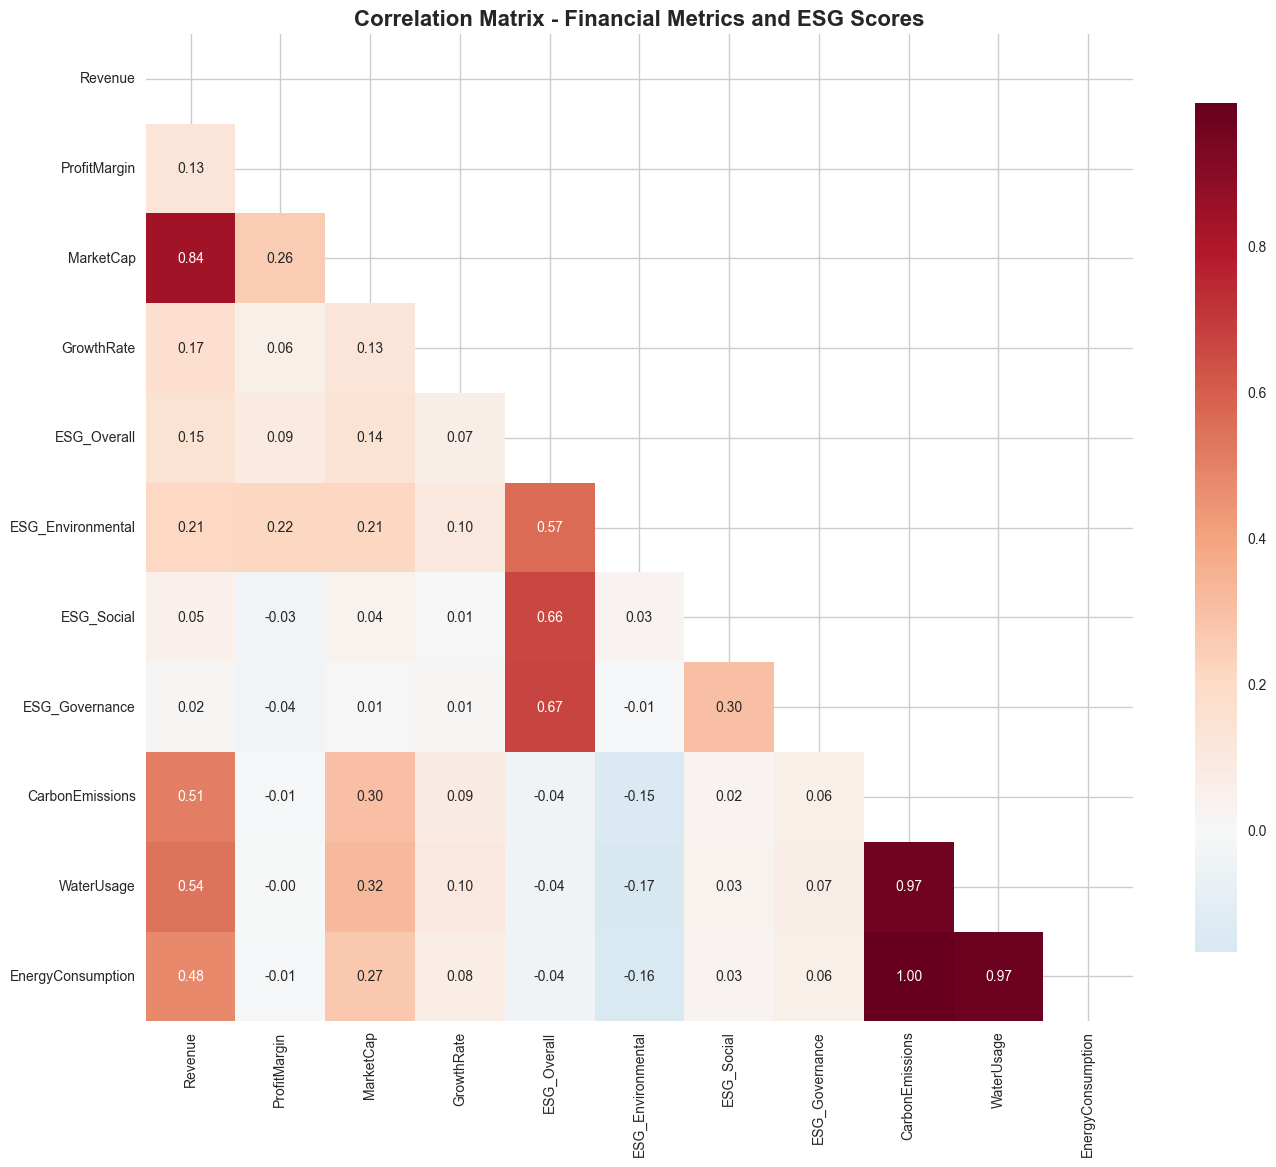

Correlation Matrix (Full):


,Revenue,ProfitMargin,MarketCap,GrowthRate,ESG_Overall,ESG_Environmental,ESG_Social,ESG_Governance,CarbonEmissions,WaterUsage,EnergyConsumption
Revenue,1.000,0.132,0.837,0.165,0.149,0.207,0.047,0.018,0.508,0.540,0.477
ProfitMargin,0.132,1.000,0.260,0.061,0.088,0.219,-0.033,-0.035,-0.006,-0.003,-0.010
MarketCap,0.837,0.260,1.000,0.130,0.144,0.215,0.039,0.008,0.300,0.320,0.269
GrowthRate,0.165,0.061,0.130,1.000,0.068,0.102,0.007,0.014,0.087,0.101,0.077
ESG_Overall,0.149,0.088,0.144,0.068,1.000,0.568,0.662,0.671,-0.040,-0.043,-0.044
ESG_Environmental,0.207,0.219,0.215,0.102,0.568,1.000,0.025,-0.010,-0.152,-0.168,-0.158
ESG_Social,0.047,-0.033,0.039,0.007,0.662,0.025,1.000,0.298,0.024,0.033,0.025
ESG_Governance,0.018,-0.035,0.008,0.014,0.671,-0.010,0.298,1.000,0.063,0.066,0.062
CarbonEmissions,0.508,-0.006,0.300,0.087,-0.040,-0.152,0.024,0.063,1.000,0.969,0.997
WaterUsage,0.540,-0.003,0.320,0.101,-0.043,-0.168,0.033,0.066,0.969,1.000,0.975


In [50]:
# Calculate correlation matrix for numerical features
correlation_matrix = data[numerical_features].corr()

print("CORRELATION ANALYSIS")
print("="*80)

# Create correlation heatmap
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Mask upper triangle
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={"shrink": .8})
plt.title('Correlation Matrix - Financial Metrics and ESG Scores', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("Correlation Matrix (Full):")
display(correlation_matrix.round(3))


FINANCIAL vs ESG CORRELATIONS
--------------------------------------------------
Financial Metrics vs ESG Scores Correlations:


,ESG_Overall,ESG_Environmental,ESG_Social,ESG_Governance
Revenue,0.149,0.207,0.047,0.018
ProfitMargin,0.088,0.219,-0.033,-0.035
MarketCap,0.144,0.215,0.039,0.008
GrowthRate,0.068,0.102,0.007,0.014


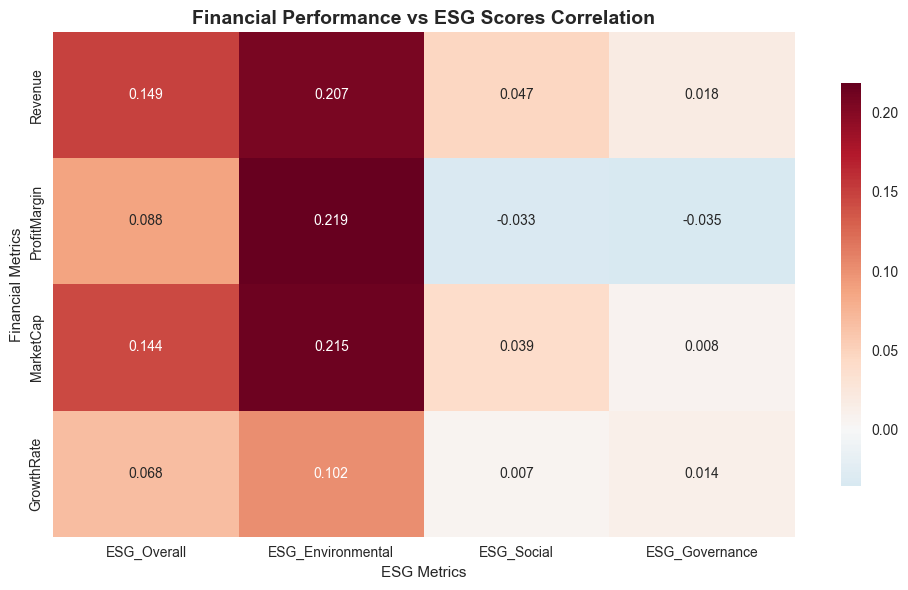


STRONGEST CORRELATIONS (Financial vs ESG):
--------------------------------------------------
• ProfitMargin ↔ ESG_Environmental: 0.219 (positive)
• MarketCap ↔ ESG_Environmental: 0.215 (positive)
• Revenue ↔ ESG_Environmental: 0.207 (positive)
• Revenue ↔ ESG_Overall: 0.149 (positive)
• MarketCap ↔ ESG_Overall: 0.144 (positive)
• GrowthRate ↔ ESG_Environmental: 0.102 (positive)
• ProfitMargin ↔ ESG_Overall: 0.088 (positive)
• GrowthRate ↔ ESG_Overall: 0.068 (positive)
• Revenue ↔ ESG_Social: 0.047 (positive)
• MarketCap ↔ ESG_Social: 0.039 (positive)


In [51]:
# Financial vs ESG Correlations Analysis
print("\nFINANCIAL vs ESG CORRELATIONS")
print("-" * 50)

# Extract correlations between financial and ESG features
financial_esg_corr = correlation_matrix.loc[financial_features, esg_features]

print("Financial Metrics vs ESG Scores Correlations:")
display(financial_esg_corr.round(3))

# Visualize Financial vs ESG correlations
plt.figure(figsize=(10, 6))
sns.heatmap(financial_esg_corr, 
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            fmt='.3f',
            cbar_kws={"shrink": .8})
plt.title('Financial Performance vs ESG Scores Correlation', fontsize=14, fontweight='bold')
plt.xlabel('ESG Metrics')
plt.ylabel('Financial Metrics')
plt.tight_layout()
plt.show()

# Find strongest correlations
print("\nSTRONGEST CORRELATIONS (Financial vs ESG):")
print("-" * 50)
financial_esg_flat = financial_esg_corr.abs().stack().sort_values(ascending=False)
top_correlations = financial_esg_flat.head(10)

for (financial, esg), corr_value in top_correlations.items():
    actual_corr = financial_esg_corr.loc[financial, esg]
    direction = "positive" if actual_corr > 0 else "negative"
    print(f"• {financial} ↔ {esg}: {actual_corr:.3f} ({direction})")


ENVIRONMENTAL IMPACT CORRELATIONS
--------------------------------------------------
Environmental Impact vs ESG Scores:


,ESG_Overall,ESG_Environmental,ESG_Social,ESG_Governance
CarbonEmissions,-0.040,-0.152,0.024,0.063
WaterUsage,-0.043,-0.168,0.033,0.066
EnergyConsumption,-0.044,-0.158,0.025,0.062



Environmental Impact vs Financial Metrics:


,Revenue,ProfitMargin,MarketCap,GrowthRate
CarbonEmissions,0.508,-0.006,0.300,0.087
WaterUsage,0.540,-0.003,0.320,0.101
EnergyConsumption,0.477,-0.010,0.269,0.077


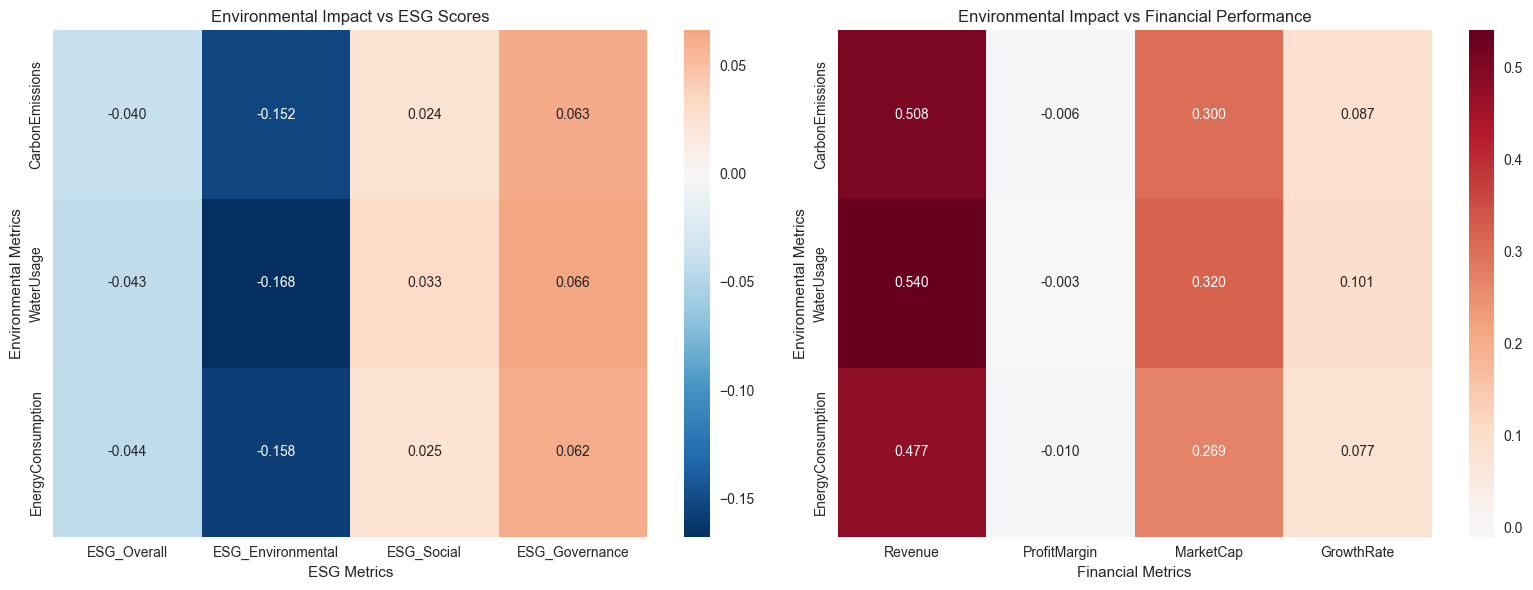

In [52]:
# Environmental Impact vs ESG/Financial Correlations
print("\nENVIRONMENTAL IMPACT CORRELATIONS")
print("-" * 50)

# Environmental vs ESG correlations
env_esg_corr = correlation_matrix.loc[environmental_features, esg_features]
print("Environmental Impact vs ESG Scores:")
display(env_esg_corr.round(3))

# Environmental vs Financial correlations  
env_financial_corr = correlation_matrix.loc[environmental_features, financial_features]
print("\nEnvironmental Impact vs Financial Metrics:")
display(env_financial_corr.round(3))

# Visualize Environmental correlations
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Environmental vs ESG
sns.heatmap(env_esg_corr, 
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            fmt='.3f',
            ax=axes[0])
axes[0].set_title('Environmental Impact vs ESG Scores')
axes[0].set_xlabel('ESG Metrics')
axes[0].set_ylabel('Environmental Metrics')

# Environmental vs Financial
sns.heatmap(env_financial_corr, 
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            fmt='.3f',
            ax=axes[1])
axes[1].set_title('Environmental Impact vs Financial Performance')
axes[1].set_xlabel('Financial Metrics')
axes[1].set_ylabel('Environmental Metrics')

plt.tight_layout()
plt.show()


SCATTER PLOT ANALYSIS - KEY RELATIONSHIPS
--------------------------------------------------


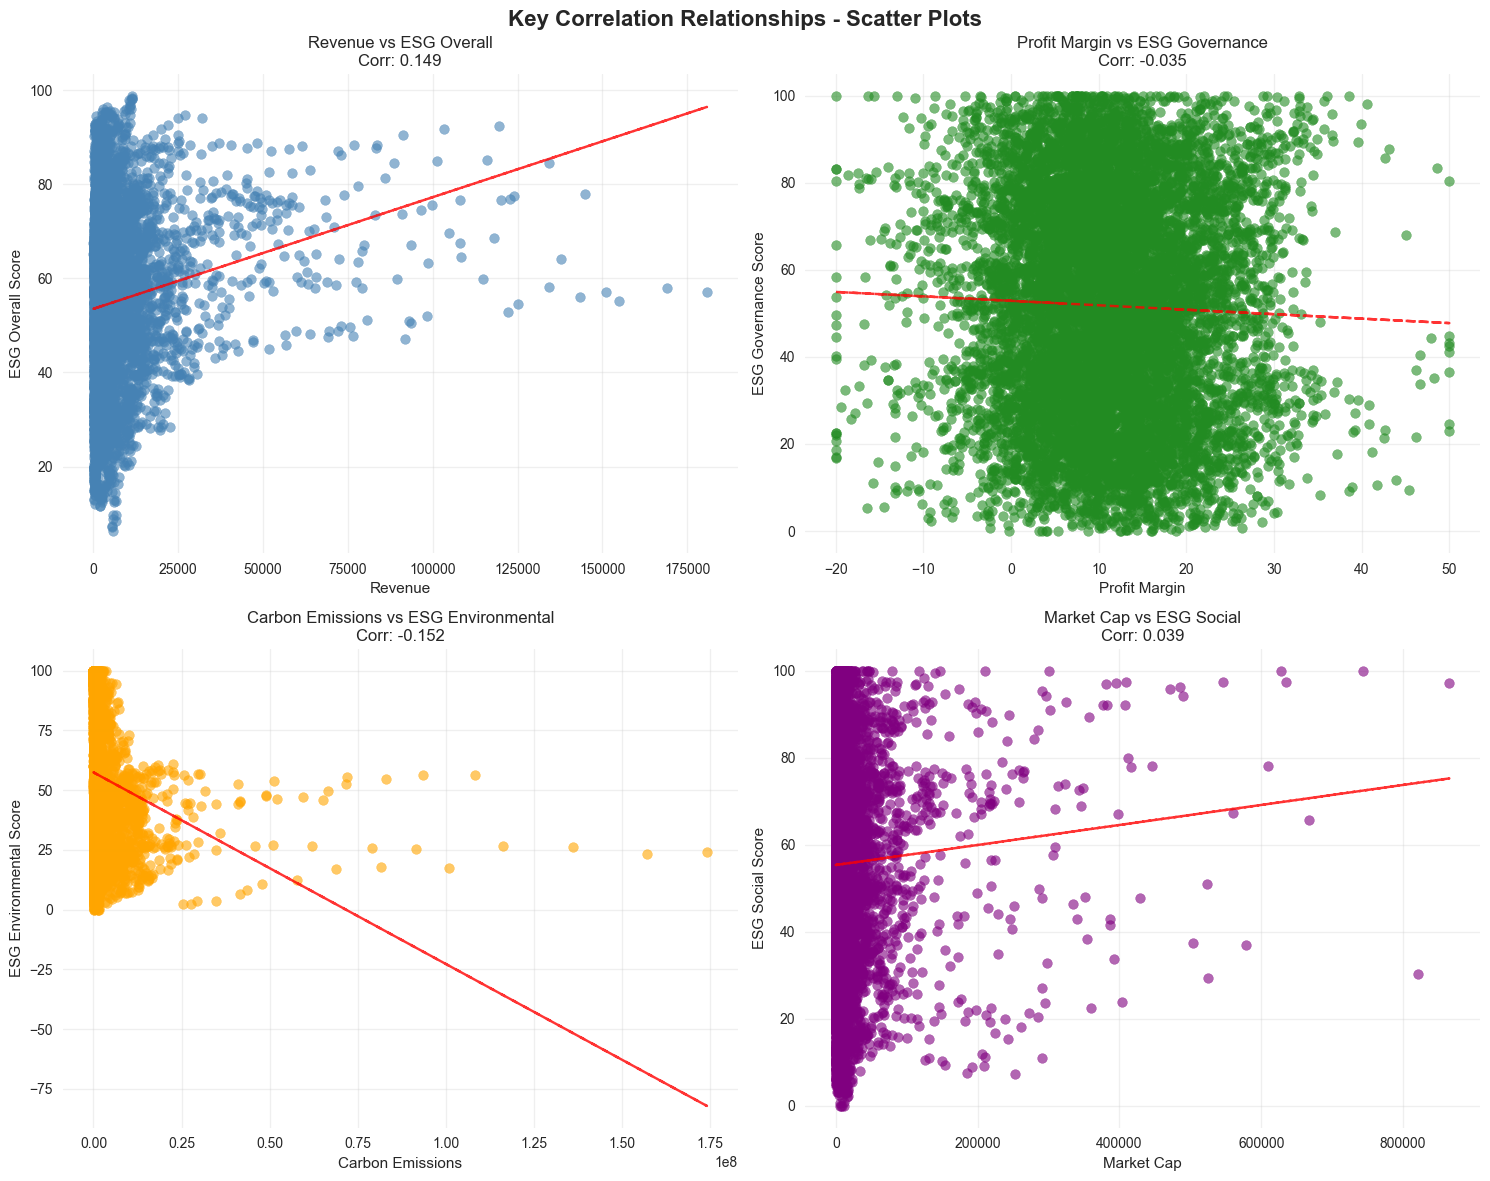

In [53]:
# Scatter Plots for Key Relationships
print("\nSCATTER PLOT ANALYSIS - KEY RELATIONSHIPS")
print("-" * 50)

# Create scatter plots for most interesting relationships
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Key Correlation Relationships - Scatter Plots', fontsize=16, fontweight='bold')

# Plot 1: Revenue vs ESG_Overall
axes[0, 0].scatter(data['Revenue'], data['ESG_Overall'], alpha=0.6, color='steelblue')
axes[0, 0].set_xlabel('Revenue')
axes[0, 0].set_ylabel('ESG Overall Score')
axes[0, 0].set_title(f'Revenue vs ESG Overall\nCorr: {correlation_matrix.loc["Revenue", "ESG_Overall"]:.3f}')
axes[0, 0].grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(data['Revenue'].dropna(), data['ESG_Overall'].dropna(), 1)
p = np.poly1d(z)
axes[0, 0].plot(data['Revenue'].dropna(), p(data['Revenue'].dropna()), "r--", alpha=0.8)

# Plot 2: ProfitMargin vs ESG_Governance
axes[0, 1].scatter(data['ProfitMargin'], data['ESG_Governance'], alpha=0.6, color='forestgreen')
axes[0, 1].set_xlabel('Profit Margin')
axes[0, 1].set_ylabel('ESG Governance Score')
axes[0, 1].set_title(f'Profit Margin vs ESG Governance\nCorr: {correlation_matrix.loc["ProfitMargin", "ESG_Governance"]:.3f}')
axes[0, 1].grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(data['ProfitMargin'].dropna(), data['ESG_Governance'].dropna(), 1)
p = np.poly1d(z)
axes[0, 1].plot(data['ProfitMargin'].dropna(), p(data['ProfitMargin'].dropna()), "r--", alpha=0.8)

# Plot 3: CarbonEmissions vs ESG_Environmental
axes[1, 0].scatter(data['CarbonEmissions'], data['ESG_Environmental'], alpha=0.6, color='orange')
axes[1, 0].set_xlabel('Carbon Emissions')
axes[1, 0].set_ylabel('ESG Environmental Score')
axes[1, 0].set_title(f'Carbon Emissions vs ESG Environmental\nCorr: {correlation_matrix.loc["CarbonEmissions", "ESG_Environmental"]:.3f}')
axes[1, 0].grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(data['CarbonEmissions'].dropna(), data['ESG_Environmental'].dropna(), 1)
p = np.poly1d(z)
axes[1, 0].plot(data['CarbonEmissions'].dropna(), p(data['CarbonEmissions'].dropna()), "r--", alpha=0.8)

# Plot 4: MarketCap vs ESG_Social
axes[1, 1].scatter(data['MarketCap'], data['ESG_Social'], alpha=0.6, color='purple')
axes[1, 1].set_xlabel('Market Cap')
axes[1, 1].set_ylabel('ESG Social Score')
axes[1, 1].set_title(f'Market Cap vs ESG Social\nCorr: {correlation_matrix.loc["MarketCap", "ESG_Social"]:.3f}')
axes[1, 1].grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(data['MarketCap'].dropna(), data['ESG_Social'].dropna(), 1)
p = np.poly1d(z)
axes[1, 1].plot(data['MarketCap'].dropna(), p(data['MarketCap'].dropna()), "r--", alpha=0.8)

plt.tight_layout()
plt.show()

In [54]:
# Correlation Insights and Statistical Significance
print("\nCORRELATION INSIGHTS SUMMARY")
print("="*80)

# Find all significant correlations (absolute value > 0.5)
significant_corr_threshold = 0.5
strong_correlations = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) >= significant_corr_threshold:
            var1 = correlation_matrix.columns[i]
            var2 = correlation_matrix.columns[j]
            strong_correlations.append({
                'Variable_1': var1,
                'Variable_2': var2,
                'Correlation': corr_value,
                'Strength': 'Strong' if abs(corr_value) >= 0.7 else 'Moderate'
            })

strong_corr_df = pd.DataFrame(strong_correlations).sort_values('Correlation', key=abs, ascending=False)

if not strong_corr_df.empty:
    print(f"SIGNIFICANT CORRELATIONS (|r| >= {significant_corr_threshold}):")
    print("-" * 60)
    display(strong_corr_df)
else:
    print(f"No correlations found with |r| >= {significant_corr_threshold}")

# Key insights about the data
print(f"\nKEY CORRELATION INSIGHTS:")
print("-" * 40)

# ESG internal correlations
esg_internal_corr = correlation_matrix.loc[esg_features, esg_features]
avg_esg_internal = esg_internal_corr.abs().mean().mean()
print(f"• Average ESG internal correlation: {avg_esg_internal:.3f}")

# Financial internal correlations
financial_internal_corr = correlation_matrix.loc[financial_features, financial_features]
avg_financial_internal = financial_internal_corr.abs().mean().mean()
print(f"• Average Financial internal correlation: {avg_financial_internal:.3f}")

# Cross-domain correlations
avg_financial_esg = financial_esg_corr.abs().mean().mean()
print(f"• Average Financial-ESG correlation: {avg_financial_esg:.3f}")

# Environmental correlations
avg_env_esg = env_esg_corr.abs().mean().mean()
avg_env_financial = env_financial_corr.abs().mean().mean()
print(f"• Average Environmental-ESG correlation: {avg_env_esg:.3f}")
print(f"• Average Environmental-Financial correlation: {avg_env_financial:.3f}")

# Multicollinearity warning
high_corr_pairs = strong_corr_df[strong_corr_df['Correlation'].abs() >= 0.8]
if not high_corr_pairs.empty:
    print(f"\n⚠️  HIGH MULTICOLLINEARITY WARNING:")
    print(f"   {len(high_corr_pairs)} variable pairs have |r| >= 0.8")
    print(f"   Consider feature selection or dimensionality reduction for clustering")

print(f"\n💡 RECOMMENDATIONS FOR CLUSTERING:")
print("-" * 40)
print("• Variables show diverse correlation patterns - good for clustering")
print("• Consider standardization due to different scales")
print("• PCA might be beneficial if multicollinearity is high")
print("• Monitor for potential feature redundancy in clustering algorithms")


CORRELATION INSIGHTS SUMMARY
SIGNIFICANT CORRELATIONS (|r| >= 0.5):
------------------------------------------------------------


,Variable_1,Variable_2,Correlation,Strength
7,CarbonEmissions,EnergyConsumption,0.997210,Strong
8,WaterUsage,EnergyConsumption,0.974503,Strong
6,CarbonEmissions,WaterUsage,0.968974,Strong
0,Revenue,MarketCap,0.836884,Strong
5,ESG_Overall,ESG_Governance,0.671476,Moderate
4,ESG_Overall,ESG_Social,0.662357,Moderate
3,ESG_Overall,ESG_Environmental,0.568171,Moderate
2,Revenue,WaterUsage,0.540424,Moderate
1,Revenue,CarbonEmissions,0.507967,Moderate



KEY CORRELATION INSIGHTS:
----------------------------------------
• Average ESG internal correlation: 0.529
• Average Financial internal correlation: 0.448
• Average Financial-ESG correlation: 0.087
• Average Environmental-ESG correlation: 0.073
• Average Environmental-Financial correlation: 0.225

⚠️  HIGH MULTICOLLINEARITY WARNING:
   4 variable pairs have |r| >= 0.8
   Consider feature selection or dimensionality reduction for clustering

💡 RECOMMENDATIONS FOR CLUSTERING:
----------------------------------------
• Variables show diverse correlation patterns - good for clustering
• Consider standardization due to different scales
• PCA might be beneficial if multicollinearity is high
• Monitor for potential feature redundancy in clustering algorithms


## 5. Save Cleaned Data
Export the explored dataset for use in subsequent notebooks.

In [55]:
# Save the dataset for next steps
data.to_csv('../Data/eda_complete_dataset.csv', index=False)
print("Dataset saved as '../Data/eda_complete_dataset.csv' for preprocessing notebook.")

print(f"\nFinal dataset shape: {data.shape}")
print(f"Ready for preprocessing: {len(data)} companies across {data.shape[1]} features")

Dataset saved as '../Data/eda_complete_dataset.csv' for preprocessing notebook.

Final dataset shape: (11000, 16)
Ready for preprocessing: 11000 companies across 16 features


Key Distribution Insights:
----------------------------------------
• Highly skewed features (5): Revenue, MarketCap, CarbonEmissions, WaterUsage, EnergyConsumption

• Normally distributed features (6): ProfitMargin, GrowthRate, ESG_Overall, ESG_Environmental, ESG_Social, ESG_Governance

• Right-skewed features (7): Revenue, ProfitMargin, MarketCap, ESG_Environmental, CarbonEmissions, WaterUsage, EnergyConsumption

• Left-skewed features (4): GrowthRate, ESG_Overall, ESG_Social, ESG_Governance

• Features may require transformation for clustering algorithms that assume normality

• Highly skewed features might benefit from log transformation or scaling

Key Correlation Insights:
----------------------------------------
• Average ESG internal correlation: 0.529

• Average Financial internal correlation: 0.448

• Average Financial-ESG correlation: 0.087

• Average Environmental-ESG correlation: 0.073

• Average Environmental-Financial correlation: 0.225


⚠️  HIGH MULTICOLLINEARITY WARNING:
   4 variable pairs have |r| >= 0.8
   Consider feature selection or dimensionality reduction for clustering

💡 RECOMMENDATIONS FOR CLUSTERING:
----------------------------------------
• Variables show diverse correlation patterns - good for clustering

• Consider standardization due to different scales

• PCA might be beneficial if multicollinearity is high

• Monitor for potential feature redundancy in clustering algorithms